# Step-by-step Breakdown:
    Input Layer: You provide images of shape (28, 28).
    Flatten() Layer: Converts each image from shape (28, 28) to a 1D array of 784 values. So the output shape from this layer is (784,).
    Dense(128, activation='relu'): This is a fully connected layer (also called a dense layer).It has 128 neurons — and each of the 128 neurons is connected to all 784 input values. ### The reason this layer has 128 neurons is not because 784 must be reduced to 128 — it's because we choose to use 128 neurons as a design decision.

🤔 So, why 128?
It's not related to the 784 directly in a mathematical sense (like dividing or reducing). It’s a hyperparameter — a design choice.
Common choices for hidden layer sizes are 64, 128, 256, etc., and we often experiment with different values to see what works best.
The goal of this layer is to learn patterns/features from the input — more neurons can learn more complex features (but can also overfit if too many).

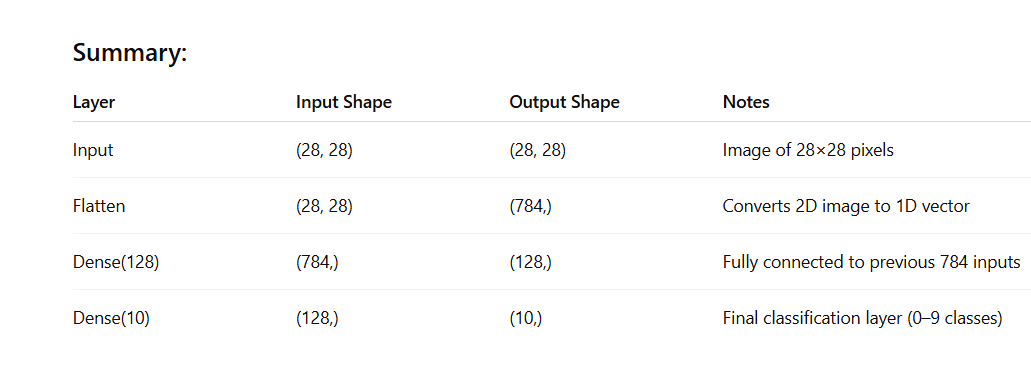

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = tf.keras.datasets.fashion_mnist

In [5]:
(training_data,training_labeled_data),(testing_data,testing_label_data) = data.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


training labeled data: 9


 training image: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   

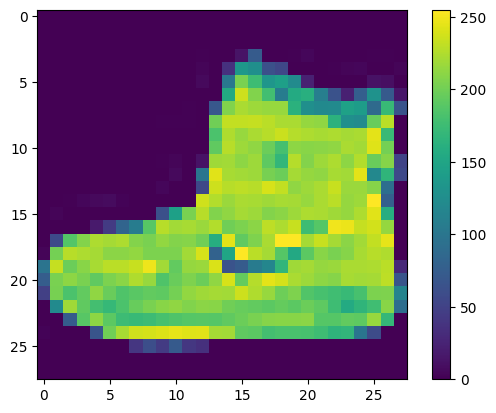

In [16]:
# setting the number of charater in one line while printing
np.set_printoptions(linewidth=320)
#setting the index and printing the image-array and coressponding labelled value
index=0
print(f'training labeled data: {training_labeled_data[index]}')
print(f'\n\n training image: {training_data[index]}')

# showing the image in matplotlib
plt.imshow(training_data[index])
plt.colorbar()
plt.show()

### normalizing the images
You'll notice that all of the values in the number are between 0 and 255. If you are training a neural network especially in image processing, for various reasons it will usually learn better if you scale all values to between 0 and 1. It's a process called normalization and fortunately in Python, it's easy to normalize an array without looping. You do it like this:

In [19]:
#normalizing the images
training_images_normalized=training_data/255
testing_images_normalized = testing_data/255

[Sequential](https://keras.io/api/models/sequential/): That defines a sequence of layers in the neural network.

[Flatten](https://keras.io/api/layers/reshaping_layers/flatten/): Remember earlier where our images were a 28x28 pixel matrix when you printed them out? Flatten just takes that square and turns it into a 1-dimensional array.

[Dense](https://keras.io/api/layers/core_layers/dense/): Adds a layer of neurons

Each layer of neurons needs an [activation function](https://keras.io/api/layers/activations/) to tell them what to do. There are a lot of options, but just use these for now: 

[ReLU](https://keras.io/api/layers/activations/#relu-function) effectively means:

```
if x > 0: 
  return x

else: 
  return 0
```

In other words, it only passes values greater than 0 to the next layer in the network.

[Softmax](https://keras.io/api/layers/activations/#softmax-function) takes a list of values and scales these so the sum of all elements will be equal to 1. When applied to model outputs, you can think of the scaled values as the probability for that class. For example, in your classification model which has 10 units in the output dense layer, having the highest value at `index = 4` means that the model is most confident that the input clothing image is a coat. If it is at index = 5, then it is a sandal, and so forth. See the short code block below which demonstrates these concepts. You can also watch this [lecture](https://www.youtube.com/watch?v=LLux1SW--oM&ab_channel=DeepLearningAI) if you want to know more about the Softmax function and how the values are computed.


In [22]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

### Compiling the Model

The next thing to do, now that the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before (notice that a class is passed to the optimizer, while a string is passed to the loss, in TF you will find that there are multiple ways of defining things, for instance "adam" would be a valid optimizer, as well as `tf.keras.losses.SparseCategoricalCrossentropy()` will be a valid loss function) -- and then you train it by calling `model.fit()` asking it to fit your training data to your training labels. It will figure out the relationship between the training data and its actual labels so in the future if you have inputs that looks like the training data, then it can predict what the label for that input is.

In [30]:
model.compile(optimizer=tf.optimizers.Adam(),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics = ["accuracy"])
model.fit(training_images_normalized, training_labeled_data, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8953 - loss: 0.2801
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9002 - loss: 0.2677
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9048 - loss: 0.2573
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9086 - loss: 0.2434
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9112 - loss: 0.2391


In [32]:
model.evaluate(testing_data,testing_label_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8690 - loss: 54.4344


[58.30486297607422, 0.8672000169754028]

In [33]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2
